# Exploring Dandiset 001375: Septum GABA disruption with DREADDs

**Disclaimer:** This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results.

## Overview of the Dandiset

This Dandiset, titled "Septum GABA disruption with DREADDs", is a pilot study investigating the effect of disrupting septal GABAergic activity using DREADDs on hippocampal and neocortical activity.

You can find the Dandiset on the DANDI Archive here: [https://dandiarchive.org/dandiset/001375/0.250406.1855](https://dandiarchive.org/dandiset/001375/0.250406.1855)

**Citation:** Eckert, Michael; McNaughton, Bruce; Ferbinteanu, Janina (2025) Septum GABA disruption with DREADDs (Version 0.250406.1855) [Data set]. DANDI Archive. https://doi.org/10.48324/dandi.001375/0.250406.1855

## What this notebook covers

This notebook will guide you through the following:
- Listing required packages.
- Loading the Dandiset using the DANDI API.
- Listing assets within the Dandiset.
- Loading a specific NWB (Neurodata Without Borders) file from the Dandiset.
- Exploring the metadata of the NWB file.
- Loading and visualizing example data from the NWB file, such as:
    - Raw electrophysiology traces.
    - Spike times for identified units.
    - Trial information.
- Summarizing findings and suggesting possible future directions.

## Required Packages

To run this notebook, you will need the following Python packages installed:

- `dandi`
- `pynwb`
- `h5py`
- `remfile`
- `numpy`
- `matplotlib`
- `pandas` (for displaying tabular data)
- `seaborn` (for enhanced plotting styles)

It is assumed that these packages are already installed on your system.

In [1]:
# Import necessary libraries
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Apply a seaborn theme for plotting aesthetics
sns.set_theme()

## Loading the Dandiset

We will use the DANDI API client to connect to the DANDI archive and access the Dandiset.

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset_id = "001375"
dandiset_version = "0.250406.1855"
dandiset = client.get_dandiset(dandiset_id, dandiset_version)

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Dandiset description: {metadata.get('description', 'N/A')}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Septum GABA disruption with DREADDs
Dandiset URL: https://dandiarchive.org/dandiset/001375/0.250406.1855
Dandiset description: Pilot study of the effect of disrupting septal gabaergic activity using DREADDs on hippocampal and neocortical activity

First 5 assets:
- sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb (ID: ce525828-8534-4b56-9e47-d2a34d1aa897)
- sub-MS14A/sub-MS14A_ses-20240906T190000_obj-12781w8_ecephys.nwb (ID: 376dc673-611b-4521-b135-9ec01c7f4f74)
- sub-MS14A/sub-MS14A_ses-20240906T190000_obj-ardad2_ecephys.nwb (ID: fea95c0e-2f07-49a3-b607-4b7e9f278e16)


## Loading an NWB File

We will now load one of the NWB files from the Dandiset to explore its contents. We'll choose the file `sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb`.

The URL for this asset is `https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/`.

In [3]:
# Load the NWB file
# The following URL corresponds to the asset sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb
nwb_file_url = "https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/"
print(f"Loading NWB file from: {nwb_file_url}")

remote_nwb_file = remfile.File(nwb_file_url)
h5_nwb_file = h5py.File(remote_nwb_file, 'r') # Ensure read-only mode for safety with remote files
nwb_io = pynwb.NWBHDF5IO(file=h5_nwb_file, mode='r') # Specify read-only mode
nwbfile = nwb_io.read()

print("\nNWB file loaded successfully.")
print(f"Session ID: {nwbfile.session_id}")
print(f"Session description: {nwbfile.session_description}")
print(f"Identifier: {nwbfile.identifier}")
print(f"Session start time: {nwbfile.session_start_time}")

Loading NWB file from: https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."



NWB file loaded successfully.
Session ID: None
Session description: mouse running laps in virtual hallway
Identifier: MS13B
Session start time: 2024-07-25 19:00:00-07:00


### Explore the NWB File with Neurosift

You can explore this NWB file interactively using Neurosift:
[https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/&dandisetId=001375&dandisetVersion=draft](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/&dandisetId=001375&dandisetVersion=draft)

### NWB File Contents Summary

Here's a summary of some key components within the loaded NWB file:

- **Subject Information:**
    - ID: `nwbfile.subject.subject_id`
    - Age: `nwbfile.subject.age`
    - Sex: `nwbfile.subject.sex`
    - Species: `nwbfile.subject.species`
    - Description: `nwbfile.subject.description`
- **Acquisition Data (`nwbfile.acquisition`):**
    - Likely contains raw electrophysiology data. We'll look for a `TimeSeries` named `time_series`.
- **Electrodes Information (`nwbfile.electrodes`):**
    - A table detailing properties of each electrode, such as location, group, and filtering.
- **Electrode Groups (`nwbfile.electrode_groups`):**
    - Information about groups of electrodes, often corresponding to shanks of a probe.
- **Units (`nwbfile.units`):**
    - Data related to sorted spike units, including spike times.
- **Trials (`nwbfile.trials` or `nwbfile.intervals['trials']`):**
    - Information about experimental trials, such as start and stop times.

### Exploring Electrode Information

In [4]:
if nwbfile.electrodes is not None:
    print("Electrodes Table:")
    # Displaying the electrodes table as a pandas DataFrame for better readability
    electrodes_df = nwbfile.electrodes.to_dataframe()
    print(electrodes_df.head())
    print(f"\nNumber of electrodes: {len(electrodes_df)}")

    # Unique locations recorded
    if 'location' in electrodes_df.columns:
        print("\nUnique electrode locations:")
        print(electrodes_df['location'].unique())
    # Unique groups recorded
    if 'group_name' in electrodes_df.columns:
        print("\nUnique electrode groups (shanks):")
        print(electrodes_df['group_name'].unique())
else:
    print("No electrodes table found in this NWB file.")

Electrodes Table:
       x       y location        filtering  \
id                                           
0   20.0  1375.0  unknown  0.1 - 7500.0 Hz   
1   20.0  1325.0  unknown  0.1 - 7500.0 Hz   
2   20.0  1275.0  unknown  0.1 - 7500.0 Hz   
3   20.0  1225.0  unknown  0.1 - 7500.0 Hz   
4   20.0  1175.0  unknown  0.1 - 7500.0 Hz   

                                                group group_name  \
id                                                                 
0   shank1 pynwb.ecephys.ElectrodeGroup at 0x13324...     shank1   
1   shank1 pynwb.ecephys.ElectrodeGroup at 0x13324...     shank1   
2   shank1 pynwb.ecephys.ElectrodeGroup at 0x13324...     shank1   
3   shank1 pynwb.ecephys.ElectrodeGroup at 0x13324...     shank1   
4   shank1 pynwb.ecephys.ElectrodeGroup at 0x13324...     shank1   

                  label  
id                       
0   shank1-electrode001  
1   shank1-electrode002  
2   shank1-electrode003  
3   shank1-electrode004  
4   shank1-electrode005  


### Exploring Trial Information

In [5]:
if nwbfile.trials is not None:
    print("Trials Table:")
    trials_df = nwbfile.trials.to_dataframe()
    print(trials_df.head())
    print(f"\nNumber of trials: {len(trials_df)}")
else:
    print("No trials table found in this NWB file (nwbfile.trials).")
    # Sometimes trials are stored in nwbfile.intervals
    if 'trials' in nwbfile.intervals:
        print("\nTrials table found in nwbfile.intervals['trials']:")
        trials_interval_df = nwbfile.intervals['trials'].to_dataframe()
        print(trials_interval_df.head())
        print(f"\nNumber of trials: {len(trials_interval_df)}")
    else:
        print("No trials information found in nwbfile.intervals['trials'] either.")

Trials Table:
    start_time  stop_time
id                       
0     4.323800  16.929833
1    16.963067  28.414333
2    28.447100  39.402833
3    39.435833  50.027033
4    50.059667  63.064467

Number of trials: 387


### Visualizing Raw Electrophysiology Data

We will load and visualize a small segment of raw electrophysiology data from the `time_series` object within `nwbfile.acquisition`.
The data is in `nwbfile.acquisition['time_series'].data`. This is a large dataset, so we will only plot a small portion.

Raw data shape: (144675584, 256)
Raw data dtype: int16
Sampling rate: 30000.0 Hz
Unit: mV
Plotting 0.1 seconds (3000 samples) for 3 channels.


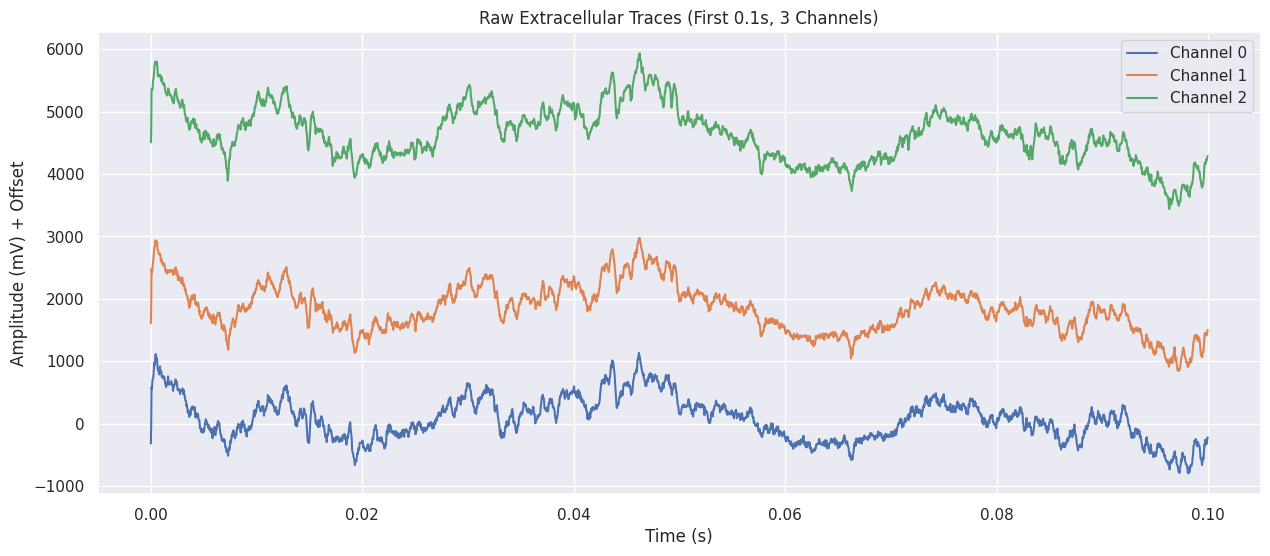

In [6]:
if "time_series" in nwbfile.acquisition:
    raw_ts = nwbfile.acquisition["time_series"]
    print(f"Raw data shape: {raw_ts.data.shape}")
    print(f"Raw data dtype: {raw_ts.data.dtype}")
    print(f"Sampling rate: {raw_ts.rate} Hz")
    print(f"Unit: {raw_ts.unit}")

    # Let's plot a short segment of data from a few channels
    # Load a small chunk of data: 1 second of data for the first 3 channels
    # Time window in seconds
    plot_duration_sec = 0.1
    num_samples_to_plot = int(plot_duration_sec * raw_ts.rate)
    num_channels_to_plot = 3

    print(f"Plotting {plot_duration_sec} seconds ({num_samples_to_plot} samples) for {num_channels_to_plot} channels.")

    # Ensure we don't try to plot more samples or channels than available
    num_samples_to_plot = min(num_samples_to_plot, raw_ts.data.shape[0])
    num_channels_to_plot = min(num_channels_to_plot, raw_ts.data.shape[1])

    if num_samples_to_plot > 0 and num_channels_to_plot > 0:
        data_subset = raw_ts.data[:num_samples_to_plot, :num_channels_to_plot]

        # Create a time vector for the x-axis
        time_vector = np.arange(num_samples_to_plot) / raw_ts.rate  # in seconds

        plt.figure(figsize=(15, 6))
        for i in range(num_channels_to_plot):
            # Offset traces for clarity
            plt.plot(time_vector, data_subset[:, i] + (i * np.mean(np.abs(data_subset[:,i])) * 5), label=f'Channel {nwbfile.electrodes.id[i] if nwbfile.electrodes is not None else i+1}')
        
        plt.title(f'Raw Extracellular Traces (First {plot_duration_sec}s, {num_channels_to_plot} Channels)')
        plt.xlabel('Time (s)')
        plt.ylabel(f'Amplitude ({raw_ts.unit}) + Offset')
        plt.legend(loc='upper right')
        plt.show()
    else:
        print("Not enough data or channels to plot.")
else:
    print("Raw acquisition TimeSeries ('time_series') not found.")

### Visualizing Spike Times (Raster Plot)

If `nwbfile.units` is available, it contains spike times for different sorted units. We can create a raster plot to visualize these spike trains.

In [7]:
if nwbfile.units is not None:
    print(f"Number of units: {len(nwbfile.units.id)}")
    units_df = nwbfile.units.to_dataframe()
    print("Units table (first 5 units):")
    print(units_df.head())

    # Create a raster plot for a subset of units and a specific time window
    plt.figure(figsize=(15, 8))
    
    num_units_to_plot = min(20, len(nwbfile.units.id)) # Plot up to 20 units
    if num_units_to_plot > 0:
        # Determine a reasonable time window, e.g., the first 10 seconds or based on trial data
        # For simplicity, let's try to find a typical trial duration if trials exist
        max_time_for_raster = 10.0 # Default to 10 seconds
        if nwbfile.trials is not None and len(nwbfile.trials.start_time) > 0:
            # Use the end time of the first trial as an example window, if short enough
            # Or a fixed duration if trials are too long / for demonstration
            first_trial_duration = nwbfile.trials.stop_time[0] - nwbfile.trials.start_time[0]
            if first_trial_duration < 30 : # Cap at 30s for example plot
                 max_time_for_raster = nwbfile.trials.stop_time[0]
            print(f"Using max_time_for_raster = {max_time_for_raster:.2f} s for raster plot.")


        event_times = []
        unit_indices = []
        unit_actual_ids = []

        for i, unit_id in enumerate(nwbfile.units.id[:num_units_to_plot]):
            # Spike times are accessed using spike_times_index
            spike_times_for_unit = nwbfile.units['spike_times'][i] # This gets all spike times for unit i
            
            # Filter spike times for the desired window
            relevant_spike_times = spike_times_for_unit[spike_times_for_unit &lt;= max_time_for_raster]
            
            event_times.append(relevant_spike_times)
            unit_indices.append(np.full_like(relevant_spike_times, i)) # y-value for plotting
            unit_actual_ids.append(unit_id)


        plt.eventplot(event_times, linelengths=0.75, colors='black')
        plt.yticks(ticks=np.arange(num_units_to_plot), labels=unit_actual_ids) # Use actual unit IDs for y-axis
        plt.xlabel('Time (s)')
        plt.ylabel('Unit ID')
        plt.title(f'Spike Raster Plot (First {num_units_to_plot} Units, up to {max_time_for_raster:.2f}s)')
        plt.xlim(0, max_time_for_raster)
        plt.show()
    else:
        print("No units found to plot.")
else:
    print("Units data ('nwbfile.units') not found.")

SyntaxError: invalid syntax (1365080984.py, line 33)

## Summary and Future Directions

This notebook demonstrated how to:
- Access and load Dandiset 001375 using the DANDI API.
- Load a specific NWB file from the Dandiset.
- Briefly explore the NWB file's metadata, including electrode information and trial structure.
- Visualize a snippet of raw electrophysiology data.
- Create a raster plot of spike times for a subset of units.

**Possible Future Directions:**

1.  **Detailed Trial Analysis:**
    *   Align neural activity (e.g., firing rates) to trial events (start/stop times).
    *   Compare activity across different trial conditions if such information is available (e.g., by extending the `trials` table with custom columns).
2.  **LFP Analysis:**
    *   If Local Field Potential (LFP) data is available (often downsampled from raw data or in a separate `LFP` object), perform spectral analysis (e.g., power spectral density, spectrograms) to investigate oscillatory activity.
3.  **Correlations and Connectivity:**
    *   Calculate spike-time correlations between pairs of units.
    *   Explore functional connectivity measures.
4.  **Spatial Analysis:**
    *   If electrode locations are precise, investigate how neural activity varies across different brain regions or depths.
5.  **Comparison Across Sessions/Subjects:**
    *   Extend this analysis to other NWB files in the Dandiset to compare findings across different recording sessions or experimental subjects (e.g., `sub-MS14A`).

Remember to consult the Dandiset's documentation and associated publications for more context on the experimental design and specific hypotheses being tested. This will help guide more targeted and meaningful analyses.

This concludes our exploration. Remember that this is a starting point, and NWB files often contain a wealth of information that can be explored in many ways.